<a href="https://colab.research.google.com/github/AlirezaAhadipour/Bank-Marketing/blob/main/Bank_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('bank-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


(array([1.760e+02, 1.160e+03, 3.937e+03, 7.810e+03, 7.326e+03, 5.599e+03,
        3.539e+03, 4.476e+03, 3.780e+03, 3.286e+03, 2.934e+03, 3.780e+02,
        2.120e+02, 1.650e+02, 1.720e+02, 1.310e+02, 8.900e+01, 2.700e+01,
        7.000e+00, 7.000e+00]),
 array([18.  , 21.85, 25.7 , 29.55, 33.4 , 37.25, 41.1 , 44.95, 48.8 ,
        52.65, 56.5 , 60.35, 64.2 , 68.05, 71.9 , 75.75, 79.6 , 83.45,
        87.3 , 91.15, 95.  ]),
 <BarContainer object of 20 artists>)

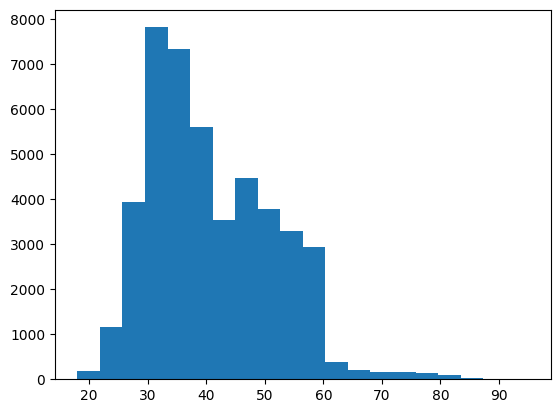

In [5]:
plt.hist(df['age'], bins=20)

Text(0.5, 0, 'Marital')

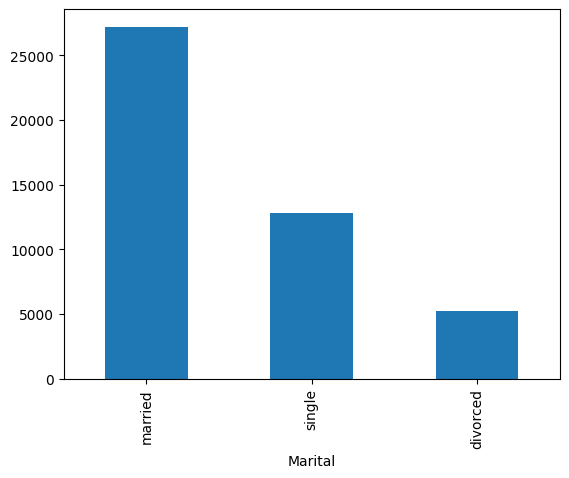

In [6]:
marital_counts = df['marital'].value_counts()
marital_counts.plot(kind='bar')
plt.xlabel('Marital')

Text(0.5, 0, 'Education')

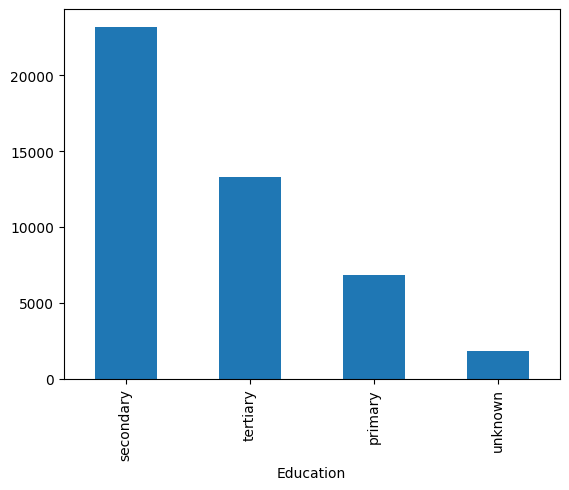

In [7]:
education_counts = df['education'].value_counts()
education_counts.plot(kind='bar')
plt.xlabel('Education')

Text(0.5, 0, 'Default')

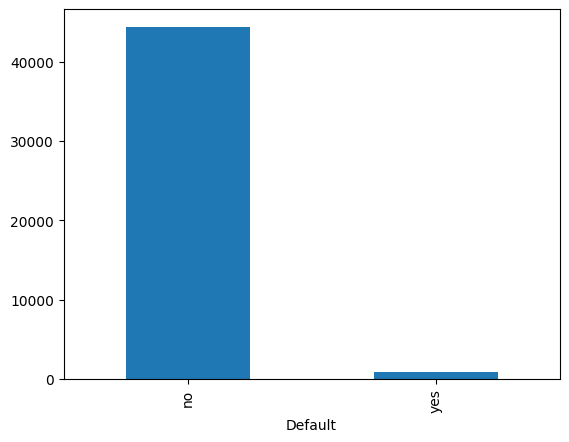

In [8]:
default_counts = df['default'].value_counts()
default_counts.plot(kind='bar')
plt.xlabel('Default')

Text(0.5, 0, 'Housing')

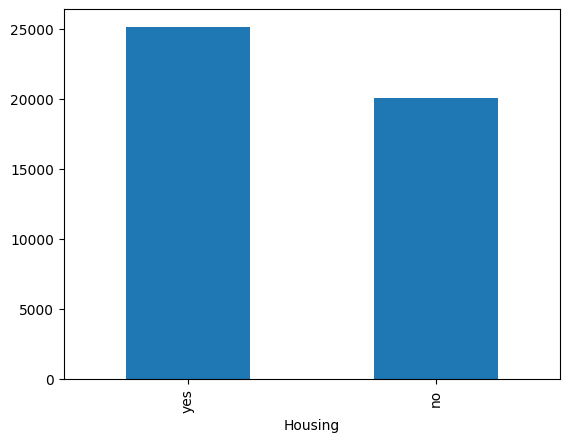

In [9]:
housing_counts = df['housing'].value_counts()
housing_counts.plot(kind='bar')
plt.xlabel('Housing')

Text(0.5, 0, 'Loan')

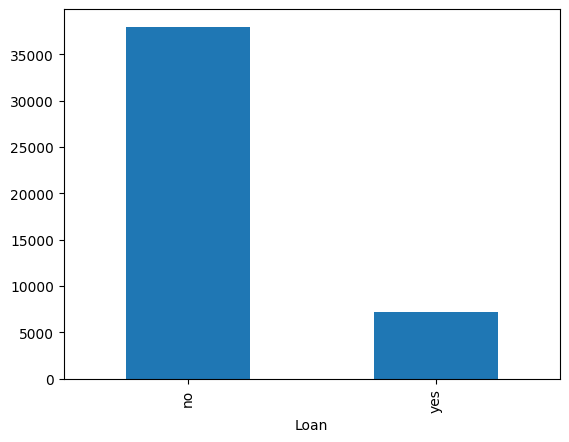

In [10]:
loan_counts = df['loan'].value_counts()
loan_counts.plot(kind = 'bar')
plt.xlabel('Loan')

Text(0, 0.5, 'balance')

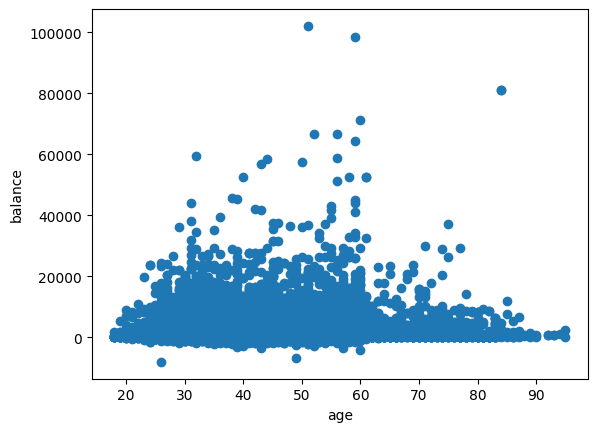

In [11]:
plt.scatter(df['age'], df['balance'])
plt.xlabel('age')
plt.ylabel('balance')

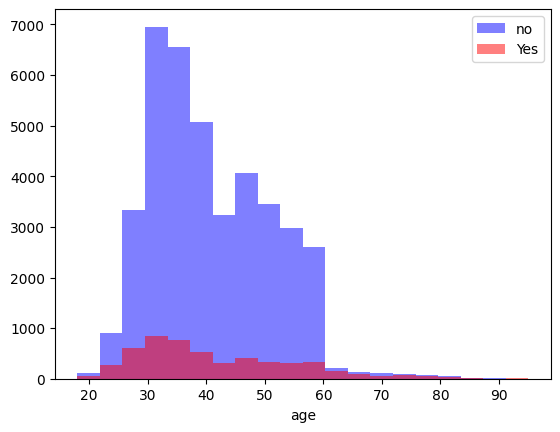

In [12]:
plt.hist(df[df['y']=='no']['age'], bins=20, alpha=0.5, color='blue', label='no')
plt.hist(df[df['y']=='yes']['age'], bins=20, alpha=0.5, color='red', label='Yes')
plt.xlabel('age')
plt.legend()

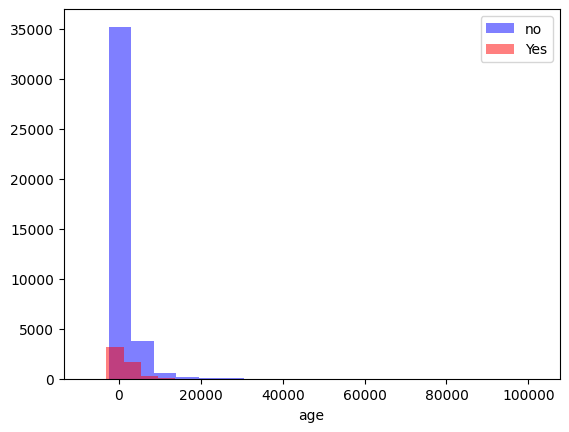

In [13]:
plt.hist(df[df['y']=='no']['balance'], bins=20, alpha=0.5, color='blue', label='no')
plt.hist(df[df['y']=='yes']['balance'], bins=20, alpha=0.5, color='red', label='Yes')
plt.xlabel('age')
plt.legend()

<ipython-input-14-10daded638b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

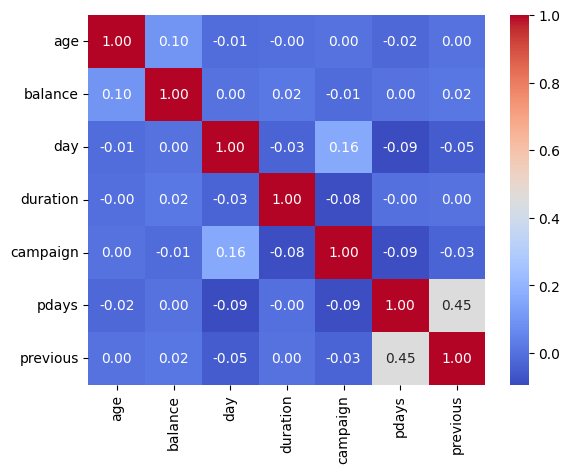

In [14]:
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

### Pre-processing

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
## Count NaN values
df.isna().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [17]:
print(df['y'].unique())

# Convert labels to 0 and 1
df['y'] = (df['y'] == 'yes').astype(int)
print(df['y'].unique())


['no' 'yes']
[0 1]


In [18]:
print(df['default'].unique())

df['default'] = (df['default'] == 'yes').astype(int)
print(df['default'].unique())


['no' 'yes']
[0 1]


In [19]:
print(df['housing'].unique())

df['housing'] = (df['housing'] == 'yes').astype(int)
print(df['housing'].unique())


['yes' 'no']
[1 0]


In [20]:
print(df['loan'].unique())

df['loan'] = (df['loan'] == 'yes').astype(int)
print(df['loan'].unique())

['no' 'yes']
[0 1]


In [21]:
month_dict = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
              'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

df['month'] = df['month'].map(month_dict)

In [22]:
# convert categorical values to dummy features

one_hot_encoded_marital = pd.get_dummies(df['marital'], prefix='marital')
one_hot_encoded_job = pd.get_dummies(df['job'], prefix='job')
one_hot_encoded_education = pd.get_dummies(df['education'], prefix='education')
one_hot_encoded_contact = pd.get_dummies(df['contact'], prefix='contact')
one_hot_encoded_poutcome = pd.get_dummies(df['poutcome'], prefix='poutcome')


df_encoded = pd.concat([df, one_hot_encoded_marital, one_hot_encoded_job, one_hot_encoded_education, one_hot_encoded_contact, one_hot_encoded_poutcome], axis=1)

# drop categorical columns
df_encoded.drop(['marital', 'job', 'education', 'contact', 'poutcome'], axis=1, inplace=True)

df_encoded.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


### Train/test split

In [23]:
from sklearn.model_selection import train_test_split

shuffled_df = df_encoded.sample(frac=1)

X = shuffled_df.drop(['y'], axis=1)
y = shuffled_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))

36168
4251
31917


In [25]:
from sklearn.preprocessing import StandardScaler

# scaling
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [26]:
# from imblearn.over_sampling import RandomOverSampler

# # oversampling
# ros = RandomOverSampler()
# X_train, y_train = ros.fit_resample(X_train, y_train)

# print(len(y_train))
# print(sum(y_train == 1))
# print(sum(y_train == 0))

### ML

In [27]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      8005
           1       0.66      0.27      0.38      1038

    accuracy                           0.90      9043
   macro avg       0.79      0.63      0.66      9043
weighted avg       0.88      0.90      0.88      9043



In [28]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=5)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8005
           1       0.63      0.49      0.55      1038

    accuracy                           0.91      9043
   macro avg       0.78      0.73      0.75      9043
weighted avg       0.90      0.91      0.90      9043



In [29]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
class_weights_dict

{0: 0.5665946047560861, 1: 4.254057868736767}

In [30]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
                 loss='binary_crossentropy')

earlystopping = EarlyStopping(monitor='val_loss', start_from_epoch=10, patience=10, restore_best_weights=True)

history = nn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,
    callbacks=[earlystopping]
)


Epoch 1/100
905/905 [==============================] - 3s 2ms/step - loss: 0.5782 - val_loss: 0.5263
Epoch 2/100
905/905 [==============================] - 2s 3ms/step - loss: 0.4601 - val_loss: 0.4463
Epoch 3/100
905/905 [==============================] - 3s 3ms/step - loss: 0.4305 - val_loss: 0.4364
Epoch 4/100
905/905 [==============================] - 2s 2ms/step - loss: 0.4190 - val_loss: 0.4065
Epoch 5/100
905/905 [==============================] - 2s 2ms/step - loss: 0.4122 - val_loss: 0.4159
Epoch 6/100
905/905 [==============================] - 2s 2ms/step - loss: 0.4060 - val_loss: 0.4279
Epoch 7/100
905/905 [==============================] - 2s 2ms/step - loss: 0.4014 - val_loss: 0.4116
Epoch 8/100
905/905 [==============================] - 3s 4ms/step - loss: 0.3973 - val_loss: 0.4107
Epoch 9/100
905/905 [==============================] - 2s 2ms/step - loss: 0.3936 - val_loss: 0.4039
Epoch 10/100
905/905 [==============================] - 2s 2ms/step - loss: 0.3904 - val_lo

In [31]:
y_pred = nn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

print(classification_report(y_test, y_pred))

283/283 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8005
           1       0.37      0.82      0.51      1038

    accuracy                           0.82      9043
   macro avg       0.67      0.82      0.70      9043
weighted avg       0.90      0.82      0.85      9043

